In [ ]:
# Implementing Feedforward neural networks with Keras and TensorFlow a. Import the necessary packages b. Load the training and testing data (MNIST) c. Define the network architecture using Keras d. Train the model using SGD e. Evaluate the network f. Plot the training loss and accuracy

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [ ]:
from keras import datasets

#import dataset and split into train and test dataset
(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

In [ ]:
# To see length of training and testing datasets
print('Testing:', len(x_train))

print('Testing:', len(x_test))

Testing: 60000
Testing: 10000


In [ ]:
# To see shape of training dataset
print(x_train.shape)

(60000, 28, 28)


In [ ]:
# To see shape of testing dataset
print(x_test.shape)

(10000, 28, 28)


In [ ]:
# Printing first indexed data of training
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

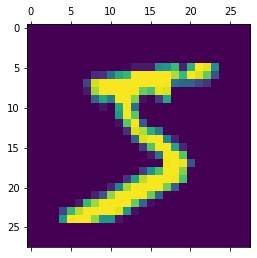

In [ ]:
# To see the first image from train[0]
plt.matshow(x_train[0])

In [ ]:
# Normalize the image by scaling pixel intensities to 0-1
x_train = x_train / 255
x_test = x_test / 255

In [ ]:
print(x_train[0])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
# Creating the model 
# Using RELU as activation function Return : 0 --> input negative 1: input is linear

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.6628 - accuracy: 0.8346 - val_loss: 0.3573 - val_accuracy: 0.9032
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3379 - accuracy: 0.9062 - val_loss: 0.2941 - val_accuracy: 0.9193
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2901 - accuracy: 0.9184 - val_loss: 0.2625 - val_accuracy: 0.9275
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2610 - accuracy: 0.9264 - val_loss: 0.2414 - val_accuracy: 0.9319
Epoch 5/10
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2392 - accuracy: 0.9327 - val_loss: 0.2252 - val_accuracy: 0.9361
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2210 - accuracy: 0.9383 - val_loss: 0.2111 - val_accuracy: 0.9391
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2055 - accuracy: 0.9424 - val_loss: 0.1958 - val_accuracy:

In [ ]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print('Testing loss:%.3f' %test_loss)
print('Testing Acc:%.3f' %test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.1661 - accuracy: 0.9511
Testing loss:0.166
Testing Acc:0.951


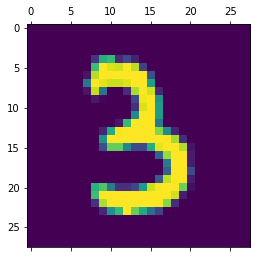

In [ ]:
n=random.randint(0,9999)
plt.matshow(x_test[n])

In [ ]:
# We use predict() on new data
predicted_value = model.predict(x_test)
print("Handwritten number in the image is = %d" %np.argmax(predicted_value[n]))

313/313 [==============================] - 1s 2ms/step
Handwritten number in the image is = 3


In [ ]:
# Plotting the loss and accuracy graphs
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

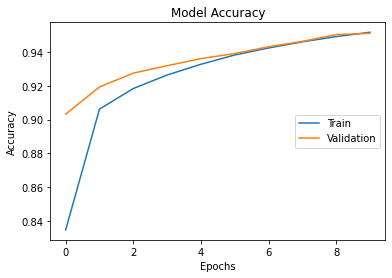

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['Train', 'Validation'], loc='center right')
plt.show()

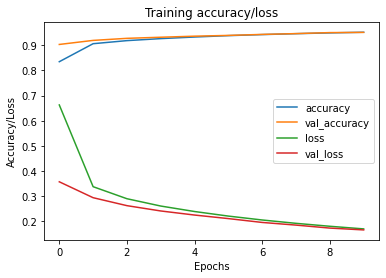

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Training accuracy/loss')
plt.ylabel('Accuracy/Loss')
plt.xlabel('Epochs')
plt.legend(['accuracy', 'val_accuracy', 'loss', 'val_loss'], loc='center right')
plt.show()



*   import libraries
*   import dataset from mnist into train and test
*   print length and shape of training and testing dataset
*   print first index data of train
*   see the first index image
*   Normalize the image
*   print x_train[0]
*   Create Model & see summary
*   Compile the model
*   Fit the model
*   Evaluate model
*   plot the training loss and accuracy
